In [55]:
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt 


In [56]:
# seasons average:https://www.teamrankings.com/nba/stat/personal-fouls-per-game
# playoffs average: https://www.basketball-reference.com/playoffs/series.html

In [57]:
# Created years_for_url variable to store years, to be used for url in our webscrape using BeautifulSoup.
# Saved average personal fouls to averages variable.

years_for_url = ['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']

averages = []
for i in years_for_url:
    url = "https://www.teamrankings.com/nba/stat/personal-fouls-per-game?date={}-06-16".format(i) 
    response = get(url) 
    soup = BeautifulSoup(response.text, 'lxml')

    row_data = soup.findAll('tr')

    pf = []
    for row in row_data[1:]:
        pf.append(float(row.find_all('td')[2].text))
    avg = round(sum(pf) / len(pf),2)
    averages.append(avg)

In [58]:
# Actual years corresponding with averages. One less for each year than our url.
actual_years = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']

In [59]:
seasonal_averages = pd.DataFrame({
    "years":actual_years,
    "season_fouls": averages,
})

In [60]:
seasonal_averages

,years,season_fouls
0,2010,20.77
1,2011,19.69
2,2012,20.00
3,2013,20.80
4,2014,20.34
5,2015,20.32
6,2016,19.95
7,2017,19.92
8,2018,20.98
9,2019,20.58


In [61]:
# Used a for loop to loop through all the playoff season PF data. Saved PF averages in playoff_averages variable.
playoff_averages = []
for i in range(0,10):
    playoff = pd.read_csv('playoffs201{}.csv'.format(i),header=1)
    average = round(playoff['PF'].mean(),2)
    playoff_averages.append(average)

In [62]:
playoff_averages

[23.43, 21.59, 21.16, 22.19, 22.31, 22.34, 21.19, 21.01, 21.2, 22.06]

In [63]:
# Created a new column in our dataframe and set it equal to playoff_averages.
seasonal_averages['playoff_fouls'] = playoff_averages
seasonal_averages

,years,season_fouls,playoff_fouls
0,2010,20.77,23.43
1,2011,19.69,21.59
2,2012,20.00,21.16
3,2013,20.80,22.19
4,2014,20.34,22.31
5,2015,20.32,22.34
6,2016,19.95,21.19
7,2017,19.92,21.01
8,2018,20.98,21.20
9,2019,20.58,22.06


In [64]:
# Used matplotlib to plot data columns from our seasonal_averages dataframe.
x = seasonal_averages['years']
y = seasonal_averages['season_fouls']
z = seasonal_averages['playoff_fouls']

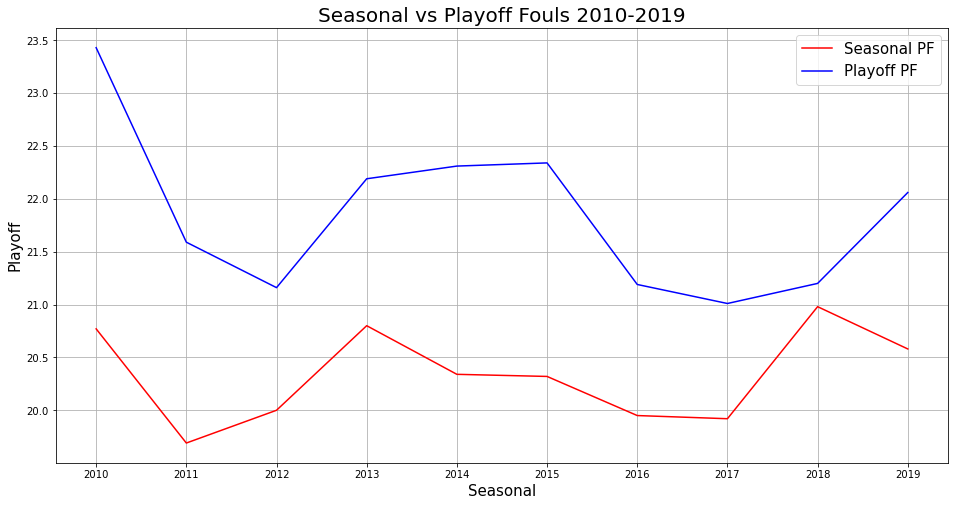

In [65]:
plt.figure(figsize=(16,8))
plt.plot(x,y,color = 'r', label= 'Seasonal PF')
plt.plot(x,z,color='b', label= 'Playoff PF')
plt.title("Seasonal vs Playoff Fouls 2010-2019", fontsize=20)
plt.xlabel('Seasonal', fontsize = 15)
plt.ylabel('Playoff', fontsize = 15)
plt.grid(True)
plt.legend(fontsize=15)